In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import pandas as pd

y values
 [-0.02499479 -0.0749219  -0.12466175 -0.17409    -0.22308312 -0.27151865
 -0.31927553 -0.36623438 -0.41227783 -0.45729081 -0.5011608  -0.54377814
 -0.58503633 -0.62483223 -0.66306637 -0.69964319 -0.73447127 -0.76746355
 -0.79853758 -0.82761567 -0.85462516 -0.87949853 -0.90217361 -0.92259373
 -0.94070784 -0.95647068 -0.96984283 -0.98079088 -0.98928747 -0.99531135
 -0.99884748 -0.999887   -0.99842733 -0.99447211 -0.98803123 -0.97912078
 -0.96776304 -0.9539864  -0.93782529 -0.9193201  -0.8985171  -0.87546826
 -0.85023122 -0.82286904 -0.79345011 -0.76204797 -0.72874111 -0.69361278
 -0.65675077 -0.61824723 -0.57819839 -0.53670436 -0.49386885 -0.44979892
 -0.40460473 -0.35839924 -0.31129794 -0.26341855 -0.21488076 -0.16580587
 -0.11631656 -0.06653651 -0.01659016  0.03339765  0.08330199  0.13299812
  0.18236183  0.23126972  0.27959956  0.32723055  0.37404363  0.41992179
  0.46475037  0.50841732  0.55081349  0.59183291  0.63137306  0.6693351
  0.70562415  0.74014951  0.77282489  0.80

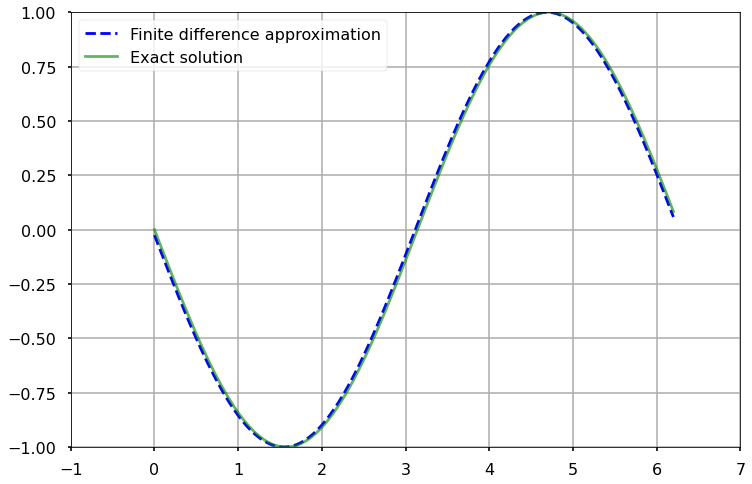

maximum error: 0.024994792100674346 for step size: 0.05


In [62]:
# step size
h = 0.05
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.cos(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = -np.sin(x_diff)

# results
print(f'y values\n {forward_diff} \n')
print(f'x values\n {x_diff} \n')

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, 'b--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, 'g-', alpha=.6, \
         label = 'Exact solution')
plt.xlim(-1, 7)
plt.ylim(-1, 1)
plt.legend()
plt.grid()
plt.show()

# Compute max error between 
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(f'maximum error: {max_error} for step size: {h}')

<Figure size 720x576 with 0 Axes>

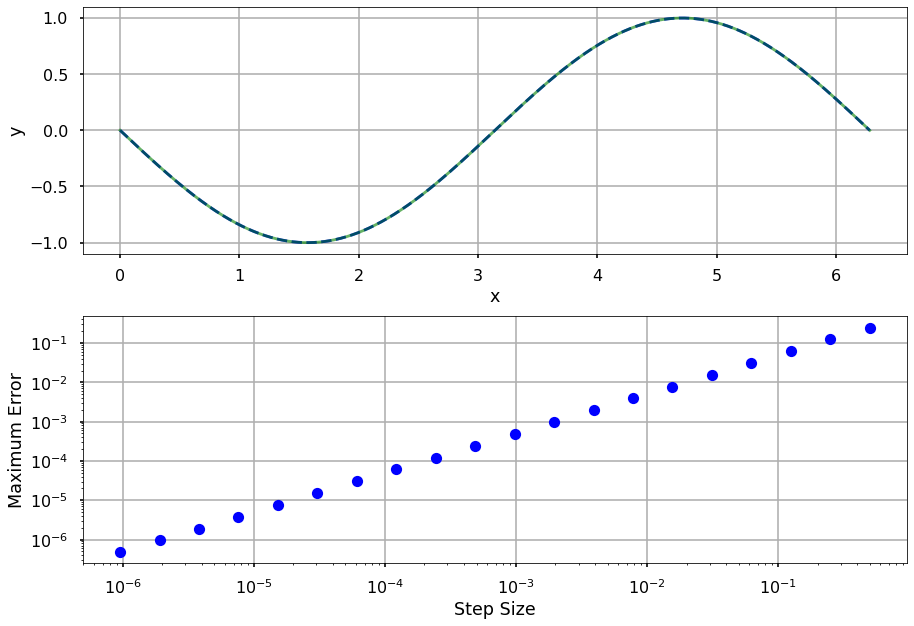

       step size     max error  error/size
0   5.000000e-01  2.481916e-01    0.496383
1   2.500000e-01  1.245713e-01    0.498285
2   1.250000e-01  6.245324e-02    0.499626
3   6.250000e-02  3.124633e-02    0.499941
4   3.125000e-02  1.562428e-02    0.499977
5   1.562500e-02  7.812377e-03    0.499992
6   7.812500e-03  3.906238e-03    0.499998
7   3.906250e-03  1.953124e-03    0.500000
8   1.953125e-03  9.765623e-04    0.500000
9   9.765625e-04  4.882812e-04    0.500000
10  4.882812e-04  2.441406e-04    0.500000
11  2.441406e-04  1.220703e-04    0.500000
12  1.220703e-04  6.103516e-05    0.500000
13  6.103516e-05  3.051758e-05    0.500000
14  3.051758e-05  1.525879e-05    0.500000
15  1.525879e-05  7.629400e-06    0.500000
16  7.629395e-06  3.814710e-06    0.500002
17  3.814697e-06  1.907375e-06    0.500007
18  1.907349e-06  9.537299e-07    0.500029
19  9.536743e-07  4.769510e-07    0.500119


In [80]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    # compute function value at grid
    y = np.cos(x) 
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = -np.sin(x_diff) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
fig = plt.figure(figsize = (10, 8))
fig, axs = plt.subplots(2, 1)

axs[0].plot(x_diff, forward_diff, 'b--', \
         label = 'Finite difference approximation')
axs[0].plot(x_diff, exact_solution, 'g-', alpha=.6, \
         label = 'Exact solution')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

axs[1].loglog(step_size, max_error, 'bo')
axs[1].set_xlabel('Step Size')
axs[1].set_ylabel('Maximum Error')
axs[1].grid()
fig.tight_layout()
plt.show()
df = pd.DataFrame()
df['step size']  = step_size
df['max error']  = max_error
df['error/size'] = np.array(max_error)/np.array(step_size)
print(df)

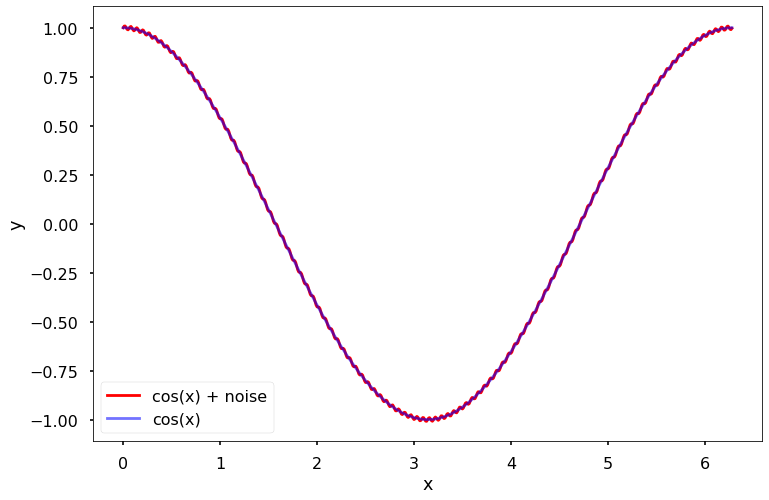

In [99]:
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x) 
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', alpha=0.55, \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

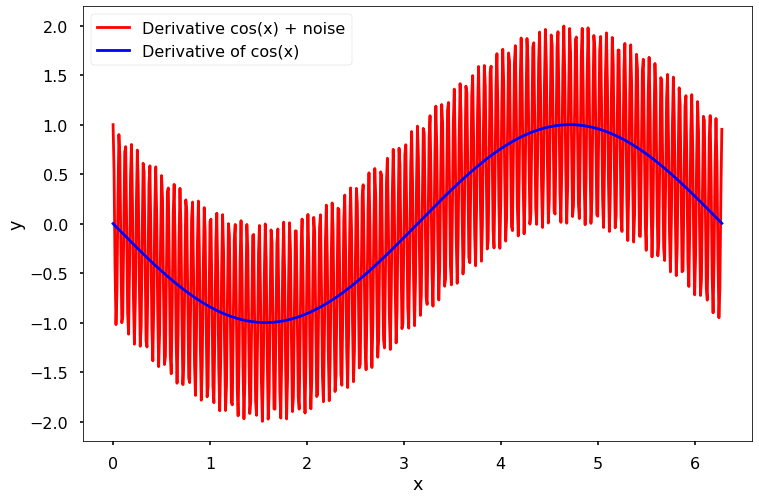

In [100]:
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
omega = 100
epsilon = 0.01
y = -np.sin(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

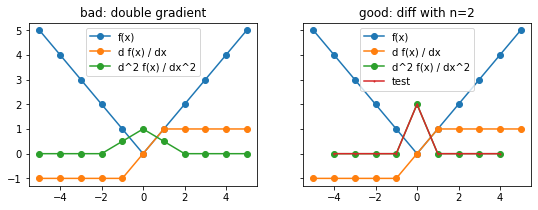

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.arange(-5,6,1)
f = np.abs(xs)
f_x = np.gradient(f)
f_xx_bad = np.gradient(f_x)
f_xx_good = np.diff(f, 2)
test = f[:-2] - 2* f[1:-1] + f[2:]





# lets plot all this

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

ax = axs[0]
ax.set_title('bad: double gradient')
ax.plot(xs, f, marker='o', label='f(x)')
ax.plot(xs, f_x, marker='o', label='d f(x) / dx')
ax.plot(xs, f_xx_bad, marker='o', label='d^2 f(x) / dx^2')
ax.legend()

ax = axs[1]
ax.set_title('good: diff with n=2')
ax.plot(xs, f, marker='o', label='f(x)')
ax.plot(xs, f_x, marker='o', label='d f(x) / dx')
ax.plot(xs[1:-1], f_xx_good, marker='o', label='d^2 f(x) / dx^2')
ax.plot(xs[1:-1], test, marker='o', label='test', markersize=1)
ax.legend()

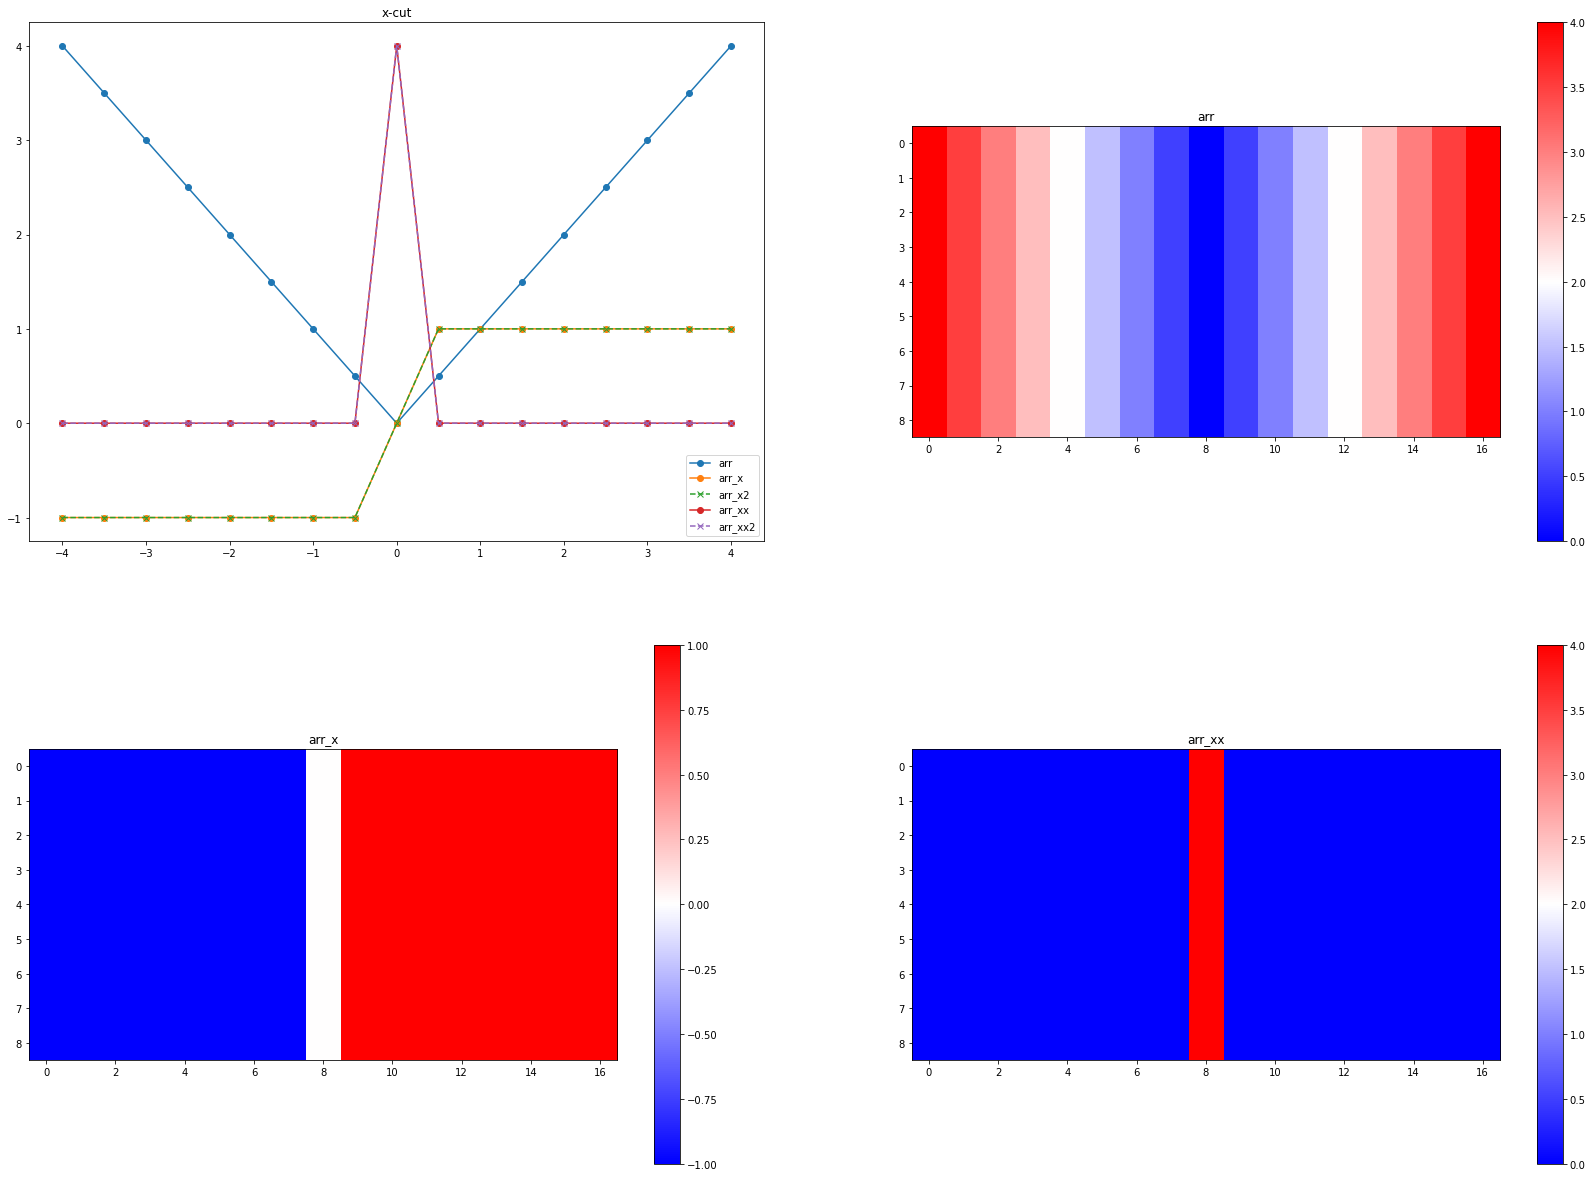

In [2]:
def gradient_n(arr, n, d=1, axis=0):
    """Differentiate np.ndarray n times.

    Similar to np.diff, but additional support of pixel distance d
    and padding of the result to the same shape as arr.

    If n is even: np.diff is applied and the result is zero-padded
    If n is odd: 
        np.diff is applied n-1 times and zero-padded.
        Then gradient is applied. This ensures the right output shape.
    """
    n2 = int((n // 2) * 2)
    diff = arr

    if n2 > 0:
        a0 = max(0, axis)
        a1 = max(0, arr.ndim-axis-1)
        diff = np.diff(arr, n2, axis=axis) / d**n2
        diff = np.pad(diff, tuple([(0,0)]*a0 + [(1,1)] +[(0,0)]*a1),
                    'constant', constant_values=0)

    if n > n2:
        assert n-n2 == 1, 'n={:f}, n2={:f}'.format(n, n2)
        diff = np.gradient(diff, d, axis=axis)

    return diff

def test_gradient_n():
    import matplotlib.pyplot as plt

    x = np.linspace(-4, 4, 17)
    y = np.linspace(-2, 2, 9)
    X, Y = np.meshgrid(x, y)
    arr = np.abs(X)
    arr_x = np.gradient(arr, .5, axis=1)
    arr_x2 = gradient_n(arr, 1, .5, axis=1)
    arr_xx = np.diff(arr, 2, axis=1) / .5**2
    arr_xx = np.pad(arr_xx, ((0, 0), (1, 1)), 'constant', constant_values=0)
    arr_xx2 = gradient_n(arr, 2, .5, axis=1)

    assert np.sum(arr_x - arr_x2) == 0
    assert np.sum(arr_xx - arr_xx2) == 0

    fig, axs = plt.subplots(2, 2, figsize=(29, 21))
    axs = np.array(axs).flatten()

    ax = axs[0]
    ax.set_title('x-cut')
    ax.plot(x, arr[0, :], marker='o', label='arr')
    ax.plot(x, arr_x[0, :], marker='o', label='arr_x')
    ax.plot(x, arr_x2[0, :], marker='x', label='arr_x2', ls='--')
    ax.plot(x, arr_xx[0, :], marker='o', label='arr_xx')
    ax.plot(x, arr_xx2[0, :], marker='x', label='arr_xx2', ls='--')
    ax.legend()

    ax = axs[1]
    ax.set_title('arr')
    im = ax.imshow(arr, cmap='bwr')
    cbar = ax.figure.colorbar(im, ax=ax, pad=.05)

    ax = axs[2]
    ax.set_title('arr_x')
    im = ax.imshow(arr_x, cmap='bwr')
    cbar = ax.figure.colorbar(im, ax=ax, pad=.05)

    ax = axs[3]
    ax.set_title('arr_xx')
    im = ax.imshow(arr_xx, cmap='bwr')
    cbar = ax.figure.colorbar(im, ax=ax, pad=.05)

test_gradient_n()


In [9]:
# After importing the function from the script file or running it
from numpy import *
from matplotlib.pyplot import *

def gradient2_even(y, h=None, edge_order=1):
    """
    Return the 2nd-order gradient i.e. 
    2nd derivatives of y with n samples and k components.
    
    The 2nd-order gradient is computed using second-order-accurate central differences
    in the interior points and either first or second order accurate one-sided
    (forward or backwards) differences at the boundaries.
    The returned gradient hence has the same shape as the input array.
    
    Parameters
    ----------
    y : 1d or 2d array_like
        The array containing the samples. If 2d with shape (n,k),
        n is the number of samples at least 2 while k is the number of
        y series/components. 1d input is equivalent to 2d input with shape (n,1).
    h : constant or 1d, optional
        spacing between the y samples. Default unitary spacing for
        all y components. Spacing can be specified using:
            
            1. Single scalar spacing value for all y components.
            2. 1d array_like of length k specifying the spacing for each y component
    
    edge_order : {1, 2}, optional
                 Order 1 means 3-point forward/backward finite differences
                 are used to calculate the 2nd derivatves at the edge points while
                 order 2 uses 4-point forward/backward finite differences.
    
    Returns
    ----------
    d2y : 1d or 2d array
        Array containing the 2nd derivatives. The output shape is the same as y.
    """
    if edge_order!=1 and edge_order!=2:
        raise ValueError('edge_order must be 1 or 2.')
    else:
        pass
    
    y = np.asfarray(y)
    origshape = y.shape
    if y.ndim!=1 and y.ndim!=2:
        raise ValueError('y can only be 1d or 2d.')
    elif y.ndim==1:
        y = np.atleast_2d(y).T
    elif y.ndim==2:
        if y.shape[0]<2:
            raise ValueError('The number of y samples must be atleast 2.')
        else:
            pass
    else:
        pass
    n,k = y.shape
    
    if h is None:
        h = 1.0
    else:
        h = np.asfarray(h)
        if h.ndim!=0 and h.ndim!=1:
            raise ValueError('h can only be 0d or 1d.')
        elif h.ndim==0:
            pass
        elif h.ndim==1 and h.size!=n:
            raise ValueError('If h is 1d, it must have the same number as the components of y.')
        else:
            pass
    d2y = np.zeros_like(y)
    if n==2:
        pass
    elif n==3:
        d2y[:] = ( 1/h**2 * (y[0] - 2*y[1] + y[2]) )
    else:
        d2y = np.zeros_like(y)
        d2y[1:-1]=1/h**2 * ( y[:-2] - 2*y[1:-1] + y[2:] )
        if edge_order==1:
            d2y[0]=1/h**2 * ( y[0] - 2*y[1] + y[2] )
            d2y[-1]=1/h**2 * ( y[-1] - 2*y[-2] + y[-3] )
        else:
            d2y[0]=1/h**2 * ( 2*y[0] - 5*y[1] + 4*y[2] - y[3] )
            d2y[-1]=1/h**2 * ( 2*y[-1] - 5*y[-2] + 4*y[-3] - y[-4] )
    return d2y.reshape(origshape)


x, h = linspace(1, 10, 1), linspace(0, 10, 17) # use a fairly coarse grid to see the discrepancies better
y = sin(x)
ypp = -sin(x) # analytical 2nd derivatives

# Compute numerically the 2nd derivatives using 2nd-order finite differences at the edge points

d2y = gradient2_even(y, h, 2)

# Compute numerically the 2nd derivatives using nested gradient function
d2y2 = gradient(gradient(y, h, edge_order=2), h, edge_order=2)

# Compute numerically the 2nd derivatives using 1st-order finite differences at the edge points
d2y3 = gradient2_even(y, h, 1)

fig,ax=subplots(1,1)
ax.plot(x, ypp, x, d2y, 'o', x, d2y2, 'o', x, d2y3, 'o'), ax.grid()
ax.legend(['Analytical', 'edge_order=2', 'nested gradient', 'edge_order=1'])
fig.tight_layout()


ValueError: If h is 1d, it must have the same number as the components of y.

In [14]:

# defining polynomial function
var = np.poly1d([2, 4, 1])
print("Polynomial function, f(x):\n", var)

# calculating the derivative
derivative = var.deriv()
print("Derivative, f(x)'=", derivative)

# calculates the derivative of after
# given value of x
print("When x=5 f(x)'=", derivative(5))


Polynomial function, f(x):
    2
2 x + 4 x + 1
Derivative, f(x)'=  
4 x + 4
When x=5 f(x)'= 24


In [27]:
# defining polynomial function
var = np.poly1d([4, 9, 5, 1, 6])

print("Polynomial function, f(x):\n", var)
  
# calculating the derivative
derivative = var.deriv()
print("Derivative, f(x)'=\n", derivative)
  
# calculates the derivative of after 
# given value of x
print("When x=3  f(x)'=", derivative(3))

Polynomial function, f(x):
    4     3     2
4 x + 9 x + 5 x + 1 x + 6
Derivative, f(x)'=
     3      2
16 x + 27 x + 10 x + 1
When x=3  f(x)'= 706


Forward difference took 0.0 seconds
Backward difference took 0.0 seconds
Centered difference took 0.0 seconds


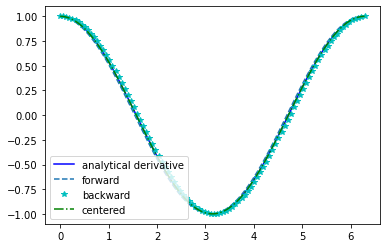

In [1]:
from pylab import *
import time

'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
dy_analytical = np.cos(x)
'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print('Forward difference took %1.1f seconds' % (time.time() - tf1))

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

print('Backward difference took %1.1f seconds' % (time.time() - tb1))

'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

print('Centered difference took %1.1f seconds' % (time.time() - tc1))

'''
the centered formula is the most accurate formula here
'''

plt.plot(x,dy_analytical, 'b-', label='analytical derivative')
plt.plot(x,dyf,'--', label='forward')
plt.plot(x,dyb,'c*', label='backward')
plt.plot(x,dyc,'g-.', label='centered')

plt.legend(loc='lower left')
plt.show()